In [64]:
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import (ward, dendrogram)

import pandas as pd
import matplotlib.pyplot as plt

# ___Clustering___
----------------

In [1]:
# The goal of clustering is to divide up the dataset into groups.
# Where similar objects are assigned to same groups and very dissimilar objects are assigned to different groups.

In [2]:
# There are two types of clustering
    # 1) Hard clustering -> Each data point belongs to exactly one class
    # 2) Soft or fuzzy clustering -> Each data point is given probabilities for memberships in each class

In [4]:
# One of the most commonly used clustering model is K-means clustering.
# K-means clustering algorithm has the following steps.

# 1) Initialization -> 
    # Pick the number of clusters (k) we want
    # Pick k random points from the dataset to serve as cluster centers.

# 2) Step A
    # Assign each data point to the nearest cluster center.

# 3) Step B
    # Update the cluster center by replacing its value with the mean of all data points with that cluster center. (assigned in step A)

# 4) Repeat steps A, B until the centers become fairly stable between successive iterations.

In [19]:
fruits = pd.read_csv("../resources/assets/fruit_data_with_colors.txt", delimiter = "\t")

In [43]:
fruits.fruit_label.values

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [21]:
fruits.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

In [29]:
kmCluster = KMeans(n_clusters = 4).fit(fruits.loc[:, ["width", "height"]])

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
kmCluster.labels_

array([0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

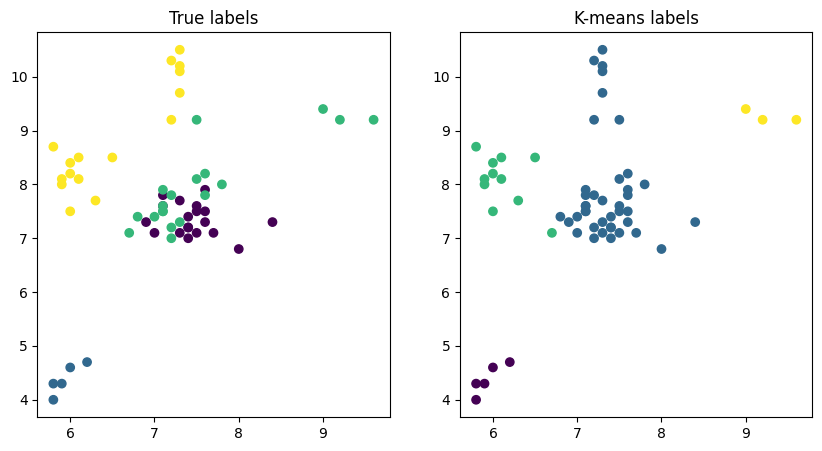

In [76]:
fig, (axes_l, axes_r) = plt.subplots(ncols = 2)
fig.set_size_inches(10, 5)

axes_l.scatter(fruits.width, fruits.height, c = fruits.fruit_label)
axes_l.set_title("True labels")
axes_r.scatter(fruits.width, fruits.height, c = kmCluster.labels_)
axes_r.set_title("K-means labels")
plt.show()

In [34]:
# k-means is very sensitive to feature values. When we have features with highly varied values, they may need to be scaled.

fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [35]:
mmax = MinMaxScaler().fit(fruits.loc[:, ["mass", "width", "height"]])

In [38]:
scaled_x = mmax.transform(fruits.loc[:, ["mass", "width", "height"]])
kmCluster = KMeans(n_clusters = 4).fit(scaled_x)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


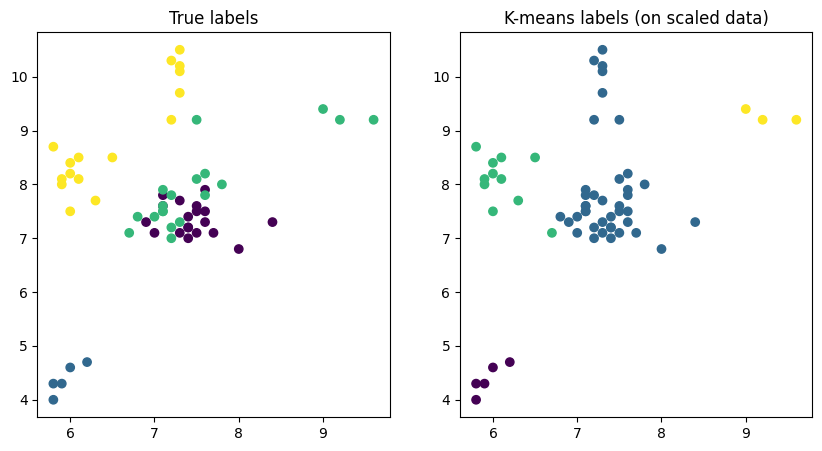

In [40]:
fig, (axes_l, axes_r) = plt.subplots(ncols = 2)
fig.set_size_inches(10, 5)

axes_l.scatter(fruits.width, fruits.height, c = fruits.fruit_label)
axes_l.set_title("True labels")
axes_r.scatter(fruits.width, fruits.height, c = kmCluster.labels_)
axes_r.set_title("K-means labels (on scaled data)")
plt.show()

In [41]:
# k-means clusetring has its own limitations.
# Works best for simple clusters of the same size, well separated and globular shaped.
# Perofrms poorly with irregular, complex clusters.
# Variants of k-means like the k-medoids can be used for categorical features. (k means only makes sense for continuous features)

## ___Agglomerative Clustering___
---------------

In [45]:
# Agglomerative clustering => a family of clustering algorithms that carry out an iterative bottom-up approach.
# First, each data point is placed into its own cluster of 1 item.
# Then a series of clusetrings are done where the uint sized clusters are merged based on similarity.
# This process is repeated until some stopping condition is met.

# In sklearn the stopping condition is the number of clusters.
# There are several criteria available to specify the way an agglomerative algorithm decides the similarity between clusters.
    # 1) Ward's method -> Merge clusters that give the smallest increase in the total variance within all clusters.
    # 2) Average linkage -> Merge clusters that has the smallest average distance between the data points.
    # 3) Complete linkage -> Merges clusters that have the smallest maximum distance between data points.

In [48]:
labels = AgglomerativeClustering(n_clusters = 4).fit_predict(scaled_x)

In [51]:
labels

array([0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

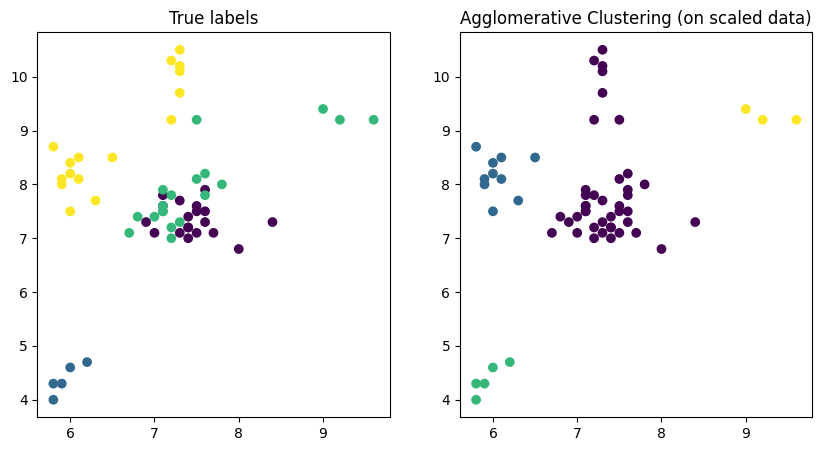

In [52]:
fig, (axes_l, axes_r) = plt.subplots(ncols = 2)
fig.set_size_inches(10, 5)

axes_l.scatter(fruits.width, fruits.height, c = fruits.fruit_label)
axes_l.set_title("True labels")
axes_r.scatter(fruits.width, fruits.height, c = labels)
axes_r.set_title("Agglomerative Clustering (on scaled data)")
plt.show()

## ___Hierarchical Clustering___
-----------------------

In [53]:
# Agglomerative clusetring does a hierarchy arrangement automatically.
# Each data point is assigned to a cluster at a specific distance from the clastering onset.
# This reflects the order and the distance of cluster assignments.
# Such hierarchies can be visualized using dendrograms, where x axes -> data points and y axes -> cluster distance.

In [57]:
ward(scaled_x)[:10]

array([[3.00000000e+01, 4.00000000e+01, 1.39860140e-02, 2.00000000e+00],
       [5.20000000e+01, 5.60000000e+01, 1.68993650e-02, 2.00000000e+00],
       [3.60000000e+01, 5.90000000e+01, 2.40081924e-02, 3.00000000e+00],
       [5.00000000e+00, 6.00000000e+00, 2.63157895e-02, 2.00000000e+00],
       [1.60000000e+01, 2.00000000e+01, 2.98014993e-02, 2.00000000e+00],
       [1.80000000e+01, 1.90000000e+01, 3.04828996e-02, 2.00000000e+00],
       [3.70000000e+01, 4.20000000e+01, 3.04828996e-02, 2.00000000e+00],
       [5.30000000e+01, 5.40000000e+01, 3.35382730e-02, 2.00000000e+00],
       [2.00000000e+00, 9.00000000e+00, 3.37987300e-02, 2.00000000e+00],
       [1.30000000e+01, 3.80000000e+01, 3.70044117e-02, 2.00000000e+00]])

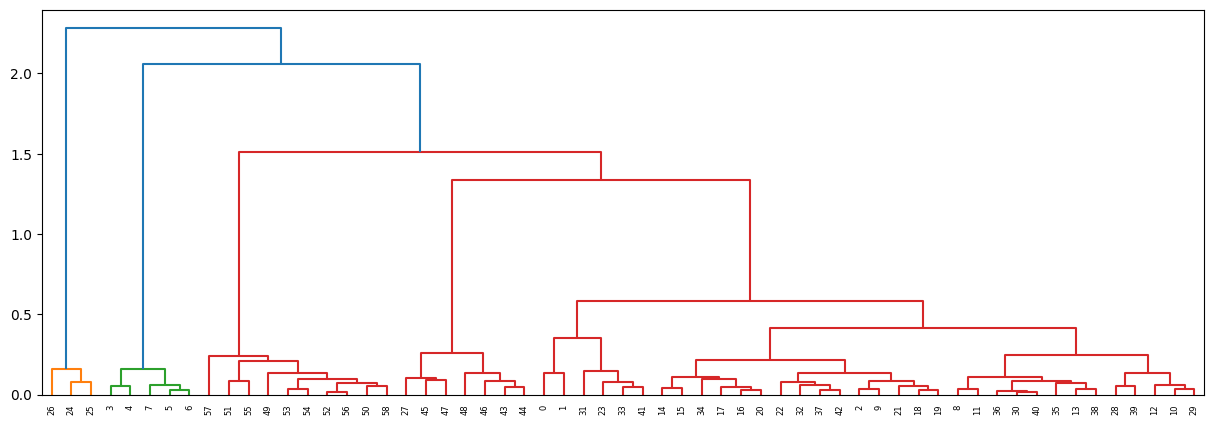

In [63]:
plt.rcParams["font.size"] = 10
fig, axes = plt.subplots()
fig.set_size_inches(15, 5)
dendrogram(ward(scaled_x))
plt.show()

## ___Density Based Spatial Clustering of Applications & Noise (DBSCAN)___
------------------------

In [65]:
# DBSCAN doesn't need the number of clusters specified in advance.
# Works well with complex datasets with iregular clusters.
# Very good at detecting outliers that should not be assigned to any clusters.

# The idea behind DBSCAN is that, clusters cover the feature space more densely
# Highly populated region of a feature space may likely define a cluster.
# Data points that lie in more dense regions are called core samples.

# While areas with less or no data points may indicate the space inbetween clusters.

In [74]:
labels = DBSCAN(eps = 0.15, min_samples = 2).fit_predict(scaled_x)

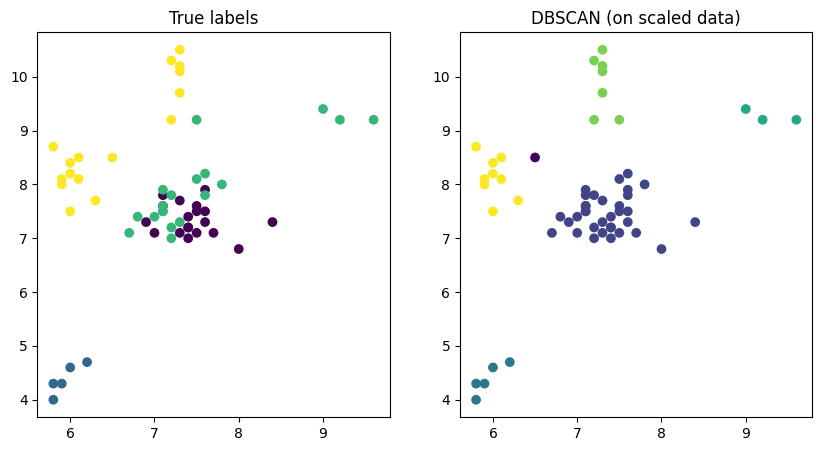

In [77]:
fig, (axes_l, axes_r) = plt.subplots(ncols = 2)
fig.set_size_inches(10, 5)

axes_l.scatter(fruits.width, fruits.height, c = fruits.fruit_label)
axes_l.set_title("True labels")
axes_r.scatter(fruits.width, fruits.height, c = labels)
axes_r.set_title("DBSCAN (on scaled data)")
plt.show()

In [ ]:
# For DBSCAN the eps and min_samples parameters need to be very carefully tuned.